# Chap2 Linear Algebra

- Scalars: just a single number
- Vectors: an array of numbers
- Matrices: 2-D array of numbers
- Tensors: arry on a regular grid with a number of axes

### Broadcasting

$\mathbf{C}=\mathbf{A}+\mathbf{b}$  
$\mathbf{b}$ is added to each row of the matrix

### Span

**Linear combination**: $\sum_ic_iv^{(i)}$  
The span of a set of vectors is the set of all points obtainable by linear combination of the original vectors 

**Linear independent**: no vector in the set is linear combination of other vectors

For $\mathbf{Ax}=\mathbf{b}$ where $A\in \mathbb{R}^{m*n}$, $b\in \mathbb{R}^m$ and $x\in \mathbb{R}^n$ to have a solution

1. $n\ge m$ (necessary but not sufficient)
2. $\mathbf{A}$ has at least a set of m (exactly) linearly independent columns (necessary and sufficient)

**Singular**: a square matrix with linearly dependent columns

### Norms

$L^p$ norm: $||x||_p=(\sum_i|x_i|^p)^\frac{1}{p}$ -> mapping vector to non-negative value

$L^2$ norm oftern notted with 2 omitted: $||x||$. Can be calculated as $x^Tx$. <- Grow slowly near 0

max norm: $||x||_\infty=max_i|x_i|$, the absolute value of the element with largest magnitude in the vector

**Frobenius norm**(measure the size of a matrix): $||A||_F=\sqrt{\sum_{i,j}A_{i,j}^2}$

Orthogonal matrix: rows & columns are **orthonormal**  
This gives $A^{-1}=A^T$

### Eigen Decomposition

**Eigenvector**:   
non-zero vector $v$ such that $\mathbf{Av}=\lambda \mathbf{v}$ ($\lambda$ is the eigen value)

**Eigen decomposition**: $\mathbf{A}=\mathbf{V}diag(\lambda)\mathbf{V}^{-1}$ 

The matrix is **singular** if and only if any eigen values are zero

- positive definite: all eigenvalues are positive
- positive semidefinite: all eigenvalues are postive or zero
- negative definite: all eigenvalues are negative
- negative semidefinite: all eigenvalues are negative or zero

real symmetric matrix is guarantedd to have an eigendecompostion

### Singular Value Decomposition

real matrix has a SVD

$\mathbf{A}=\mathbf{UDV}^T$

- $\mathbf{A}$ is $m*n$, $\mathbf{U}$ is $m*m$, $\mathbf{V}$ is $n*n$
- $\mathbf{U}$ and $\mathbf{V}$ are orthogonal, $\mathbf{D}$ is diagonal (not necessarily square)

### Moore-Penrose Pseudoinverse

Computed as: $\mathbf{A}^+=\mathbf{VD}^+\mathbf{U}^T$

$\mathbf{U},\mathbf{D}$ and $\mathbf{V}$ are singular decomposition of A, $\mathbf{D}^+$ is the taking reciprocal of non-zero elements in $\mathbf{D}$ and transpose the resulting matrix

### Trace Operator

Frobenius can be defined as $||\mathbf{A}||_F=\sqrt{Tr(\mathbf{AA}^T)}$

### Determinant

Product of all eigenvalues of the matrix

The absolute value of determinant can be thought of as a measure of how much multiplication by the matrix expands or contracts space

### Principal Components Analysis

Encoder: $\mathbf{D}$ such that $f(x)=\mathbf{D^T}x$ and $r(x)=\mathbf{DD}^Tx$ for reconstruction

Solve $\mathbf{D}^*=argmin_\mathbf{D}\sqrt{\sum_{i,j}(x_j^{i}-r(x^{(i)})_j)^2}$, subject to $\mathbf{D}^T\mathbf{D}=\mathbf{I}_l$

The principle components is the largest l eigenvectors corresponding to the largest eigenvalues of $\mathbf{X}^T\mathbf{X}$

[An explanation](http://blog.codinglabs.org/articles/pca-tutorial.html)  
[The implementation of code](http://blog.csdn.net/ksearch/article/details/22871303#)

In [1]:
from __future__ import division 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.preprocessing import normalize

/Users/BohaoHuang/anaconda2/envs/bhplayground/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
mu = np.array([1, 3])
cov = np.array([[1, 0.5], [1.5, 1]])
data = np.random.multivariate_normal(mu, cov, 1000).T
data_mean = np.mean(data, axis=1)
X = data - data_mean.reshape(2,1)

In [3]:
# PCA function
def bh_pca(X):
    (n, m) = data.shape
    # get corresponding eigenvalues and eigenvectors
    w, v = np.linalg.eig(np.cov(X))
    # reorder
    ind = np.argsort(w)
    ind = ind[::-1]
    # return corresponding eigenvalues and eigenvectors
    eig_val = w[ind]
    eig_vec = v[:,ind]
    return (eig_val, eig_vec)

In [4]:
(eig_val, eig_vec) = bh_pca(X)

In [5]:
X1 = np.dot(eig_vec[:,0].T, X).reshape(1,-1)
data_prime1 = np.dot(X1.T, eig_vec[:,0].T.reshape(1,-1)).T + data_mean.reshape(2,1)

In [6]:
X2 = np.dot(eig_vec[:,1].T, X).reshape(1,-1)
data_prime2 = np.dot(X2.T, eig_vec[:,1].T.reshape(1,-1)).T + data_mean.reshape(2,1)

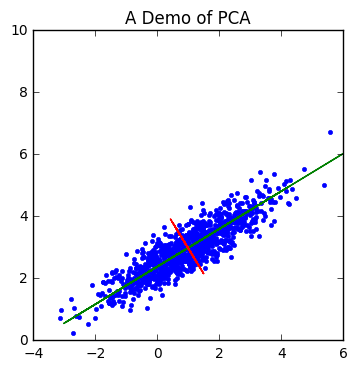

In [7]:
plt.plot(data[0,:], data[1,:],'.')
plt.plot(data_prime1[0,:], data_prime1[1,:], label='1st component')
plt.plot(data_prime2[0,:], data_prime2[1,:], label='2nd component')
plt.title('A Demo of PCA')
#plt.legend(loc='lower right')
plt.axis('square')
plt.show()